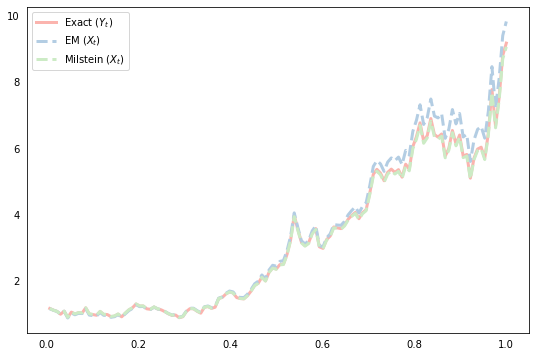

In [11]:
#!/usr/bin/python3.7
#Milstein_Correction.ipynb
#Parth Parakh
#purpose: GBM using MC with Milstein Correction
#Xn+1−Xn=a(Xn)Δt+b(Xn)ΔBn+0.5b′(Xn)b(Xn)((ΔBn)2−Δt)

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------

#Defining the parameters

# SDE model parameters
mu, sigma, X0 = 2, 1, 1;
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"];
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Simulation parameters
T, N = 1, 2**7;
dt = 1.0 / N;
t = np.arange(dt, 1 + dt, dt);

np.random.seed(1);
dB = np.sqrt(dt)*np.random.randn(N);
B  = np.cumsum(dB);

# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * B));

# EM Approximation
X_em, X = [], X0
for j in range(N):  
    X += mu*X*dt + sigma*X*dB[j]
    X_em.append(X)

X_mil, X = [], X0
for j in range(N):  
    X += mu*X*dt + sigma*X*dB[j] + 0.5*sigma**2 * X * (dB[j] ** 2 - dt)
    X_mil.append(X)
    
plt.plot(t, Y, label="Exact ($Y_t$)", color=pal[0])
plt.plot(t, X_em, label="EM ($X_t$)", color=pal[1], ls='--')
plt.plot(t, X_mil, label="Milstein ($X_t$)",color=pal[2],ls='--')
plt.legend()